Title: Gulf News
Title: Thrissur News
Title: Thiruvananthapuram News
Title: Thrissur News
Title: Kottayam News
Title: Thrissur News
Title: Malappuram News
Title: Kannur News
Title: Thrissur News
Title: Thrissur News
Title: Pathanamthitta News
Title: Kerala
Title: US News
Title: Auto News
Title: Latest News
Title: Alappuzha News
Title: Latest News
Title: Alappuzha News
Title: Ernakulam News
Title: Kollam News
Title: Latest News
Title: Kerala
Title: Kerala
Title: Pathanamthitta News
Title: Gulf News
Title: Pathanamthitta News
Title: Latest News
Title: Gulf News
Title: Idukki News
Title: Kerala
Title: Kerala
Title: Kottayam News
Title: Alappuzha News
Title: Palakkad News
Title: Idukki News
Title: Pathanamthitta News
Title: Kerala
Title: Latest News
Title: Latest News
Title: Latest News
Title: Latest News
Title: Latest News
Title: Latest News
Title: Malappuram News
Title: Malappuram News
Title: Palakkad News
Title: Thrissur News
Title: Idukki News
Title: Kollam News
Title: Kollam News
Dist

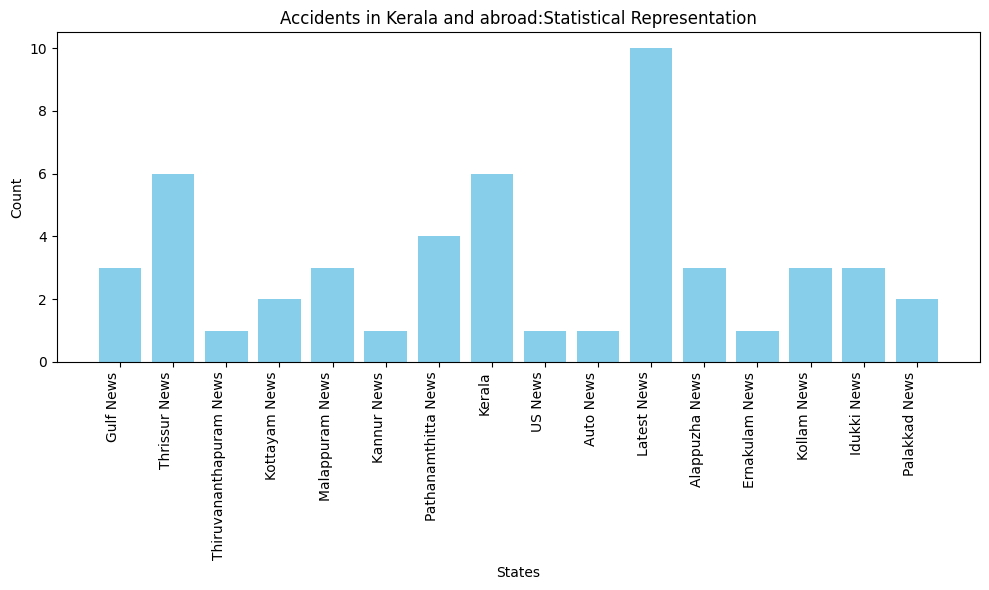

In [1]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

base_url = "https://www.manoramaonline.com/tagresults.html?tag=mo%3Acrime%2Froadaccident&page="

# List of districts
districts = ["thiruvananthapuram", "kollam", "pathanamthitta", "alappuzha",
             "kottayam", "idukki", "ernakulam", "thrissur", "palakkad",
             "malappuram", "kozhikode", "wayanad", "kannur", "kasaragod"]

# Dictionary to store the count of each district
district_counts = {district: 0 for district in districts}

# Dictionary to store the titles and their counts
title_counts = {}

for page_number in range(1, 6):  # Scraping pages 1 to 5
    url = base_url + str(page_number)
    response = requests.get(url)

    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        news_titles = soup.find_all('a', class_='cmp-story-list__pretitle')
        # Iterate over news titles
        for title_tag in news_titles:
            title = title_tag.get('title')
            print("Title:", title)
            # Store the title in the dictionary and increment its count
            if title in title_counts:
                title_counts[title] += 1
            else:
                title_counts[title] = 1
            # Check if the title matches any district name and increment its count
            for district in districts:
                if district.lower() == title.lower():
                    district_counts[district] += 1
    else:
        print(f"Failed to retrieve page {page_number}. Status code: {response.status_code}")

# Print district counts
print("District Counts:")
for district, count in district_counts.items():
    print(f"{district.capitalize()}: {count}")

# Print title counts
print("\nTitle Counts:")
for title, count in title_counts.items():

    print(f"{title}: {count}")


# Filter only the counts of Kerala districts
kerala_district_counts = {district.capitalize(): count for district, count in district_counts.items() if district.lower() in map(str.lower, districts)}

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(title_counts.keys(), title_counts.values(), color='skyblue')
plt.xlabel('States')
plt.ylabel('Count')
plt.title('Accidents in Kerala and abroad:Statistical Representation')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()



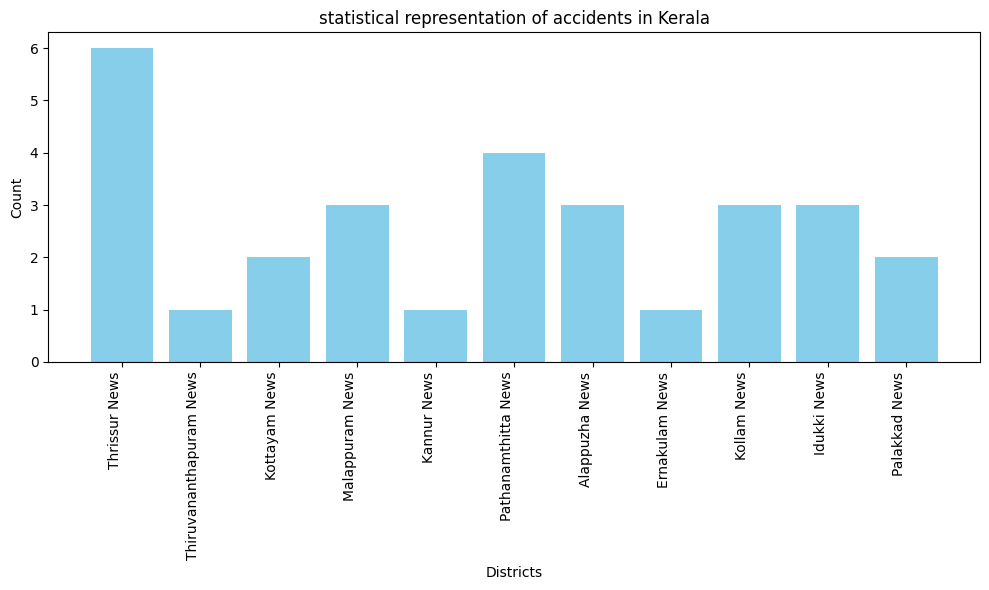

In [2]:
# List of Kerala districts
kerala_districts = ["thiruvananthapuram", "kollam", "pathanamthitta", "alappuzha",
                    "kottayam", "idukki", "ernakulam", "thrissur", "palakkad",
                    "malappuram", "kozhikode", "wayanad", "kannur", "kasaragod"]

# Filter titles containing Kerala districts
kerala_titles = {title: count for title, count in title_counts.items() if any(district.lower() in title.lower() for district in kerala_districts)}

# Plotting the bar graph for title counts related to Kerala districts
plt.figure(figsize=(10, 6))
plt.bar(kerala_titles.keys(), kerala_titles.values(), color='skyblue')
plt.xlabel('Districts')
plt.ylabel('Count')
plt.title('statistical representation of accidents in Kerala')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()


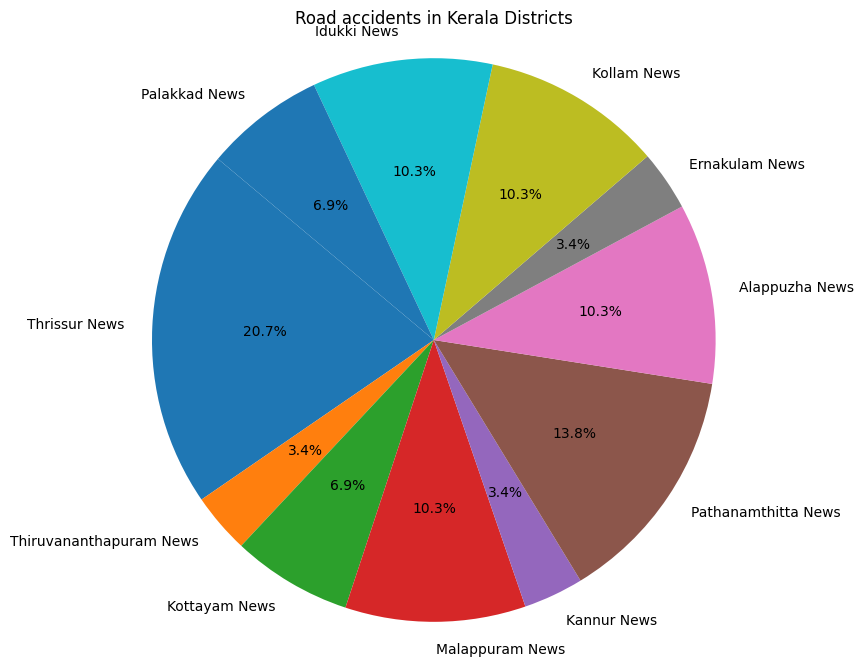

In [3]:
# Plotting the pie chart for title counts related to Kerala districts
plt.figure(figsize=(8, 8))
plt.pie(kerala_titles.values(), labels=kerala_titles.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Road accidents in Kerala Districts')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()
